## Задача 7.1

In [1]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

Определим изначальные параметры для выборок и уровень доверия $\alpha$

In [2]:
theta = 10
par = (10,3)
alpha = 0.95
size = 100

## Равномерное распределение
Пусть $X_1,...,X_n$ выборка из равномерного распределения $[0, \theta]$, $\theta > 0$. Построим доверительный интервал уровня доверия $\alpha$

## Используя статистику $\overline{X}$
Доверительный интервал
$\theta \in \left( \frac{2\overline{X}}{1 + \epsilon}, \ \frac{2\overline{X}}{1 - \epsilon} \right)$ где  $\epsilon=\sqrt{\frac{1}{3 n \alpha}}$

In [3]:
def ConfidenceFunc1(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        if mode == "up":
            a = 2*np.mean(x[:i])
            b = (1 - np.sqrt(1/(3*len(x[:i]*(alpha)))))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            a = 2*np.mean(x[:i+1])
            b = (1 + np.sqrt(1/(3*len(x[:i+1]*(alpha)))))
            if b!=0:
                result[i] = a/b
    return result

## Используя статистику $X_{(1)}$
Доверительный интервал
$\theta \in \left( X_{(1)}, \ \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}} \right)$

In [4]:
def ConfidenceFunc2(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(0, len(x)):
        if mode == "up":
            a = np.min(x[:i+1])
            b = 1 - (alpha**(1/len(x[:i+1])))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            result[i] = np.min(x[:i+1])
    return result

## Используя статистику $X_{(n)}$
Доверительный интервал
$\theta \in \left( X_{(n)}, \ \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$

In [5]:
def ConfidenceFunc3(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(0, len(x)):
        if mode == "up":
            a = np.max(x[:i+1])
            b =  ((1-alpha)**(1/len(x[:i+1])))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            result[i] = np.max(x[:i+1])
    return result

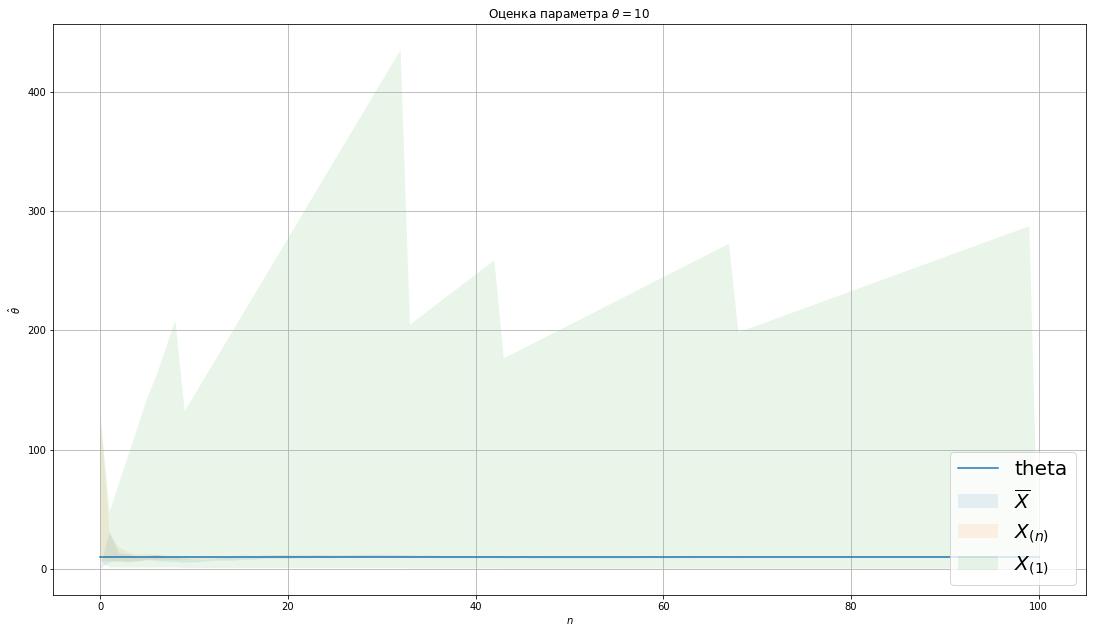

In [6]:
a = np.zeros(size)
sample = st.uniform.rvs(loc=0, scale=theta,size = size)
plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size+1), ConfidenceFunc1(sample, alpha, "up"), ConfidenceFunc1(sample, alpha, "down"),alpha=0.1,
                label = r'$\overline{X}$')
plt.fill_between(np.arange(size+1), ConfidenceFunc3(sample, alpha, "up"), ConfidenceFunc3(sample, alpha, "down"),alpha=0.1,
                label = r'$X_{(n)}$')
plt.fill_between(np.arange(size+1), ConfidenceFunc2(sample, alpha, "up"), ConfidenceFunc2(sample, alpha, "down"),alpha=0.1,
                label = r'$X_{(1)}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.show()

Построим график без доверительного интервала от статистики $X_{(1)}$

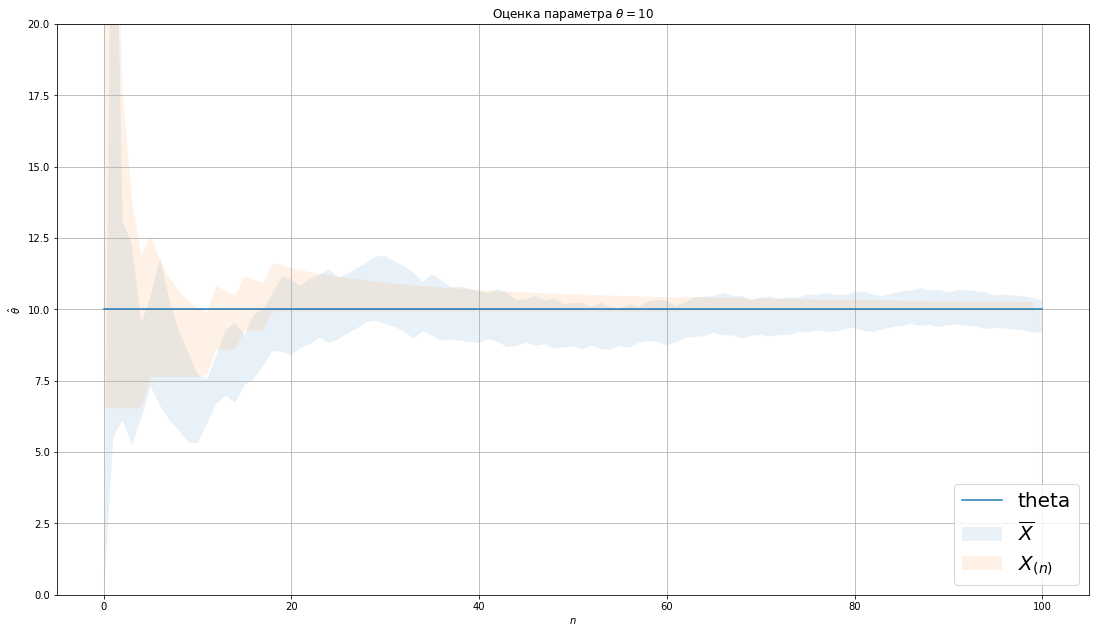

In [7]:
plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size+1), ConfidenceFunc1(sample, alpha, "up"), ConfidenceFunc1(sample, alpha, "down"),alpha=0.1,
                label = r'$\overline{X}$')
plt.fill_between(np.arange(size+1), ConfidenceFunc3(sample, alpha, "up"), ConfidenceFunc3(sample, alpha, "down"),alpha=0.1,
                label = r'$X_{(n)}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,20)
plt.show()

Оценим вероятность попадания истинного значения $\theta$ в доверительный интервал

In [113]:
p100 = np.zeros(3)
for i in range(size):
        temp_sample = st.uniform.rvs(loc=0, scale=theta,size = size)
        print(ConfidenceFunc1(temp_sample, alpha, "up")[99])

11.13728435024204
10.530126160588017
9.794429868828148
11.199907955922447
10.94208496630951
10.519390527431003
10.692234613240492
9.627927480208275
10.25237585974108
10.654288629197938
9.975768870652743
9.790747430865652
10.605699848581366
10.984504907805759
10.07535053673683
11.026845439826229
10.266367196146847
10.267576339689741
9.936987303094819
10.229888705198956
10.802548487410968
10.578734105887214
10.135228402699456
11.648577295583058
10.296512470124119
10.690065794934723
10.73736450255579
10.54536650217815
10.695625285117616
10.265271128451085
10.962574814705722
10.385935315112706
10.73177606373222
11.444719437667551
10.16715450468093
10.471624443691452
11.616899442283737
10.574559817307101
11.788030501332333
11.653835333216987
10.836347683358577
10.689868366966705
10.630234854546316
10.616637322984257
10.416332089195476
10.881088695399749
10.85835909055188
10.78408869378215
10.90575436673288
10.823482238973776
11.438061750299294
10.677975471333799
9.764671486482792
10.7531784